In [ ]:
pip install optuna catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 38 kB/s 


In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import optuna
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool

np.random.seed(42)
random.seed(42)

In [ ]:
df_train = pd.read_csv('train.csv', index_col=0) 
df_test = pd.read_csv('test.csv', index_col=0) 

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df_train[['text']],
                                                    df_train['label'],
                                                    test_size=0.3)

In [ ]:
X_test = df_test[['text']]
y_test = df_test['label']

In [ ]:
text_features = ['text']

In [ ]:
train_pool = Pool(
        X_train, 
        y_train, 
        text_features=text_features,
        feature_names=text_features
    )
valid_pool = Pool(
        X_val, 
        y_val, 
        text_features=text_features,
        feature_names=text_features
    )

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
def objective(trial):

    catboost_params = {
        "loss_function": 'MultiClass',
        "iterations": trial.suggest_int("iterations", 1000, 3000),
        "depth": trial.suggest_int("depth", 2, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 0, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        'task_type': 'GPU',
        'early_stopping_rounds': trial.suggest_int("early_stopping_rounds", 100, 1000),
        'eval_metric': 'TotalF1:average=Macro',
        'verbose': 300
    }


    model = CatBoostClassifier(**catboost_params) 
    model.fit(train_pool, eval_set=valid_pool)
    preds = model.predict(X_val)
    f1 = f1_score(y_val, preds, average='macro')

    return f1

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15, timeout=6000)

[I 2022-12-22 19:21:44,789] A new study created in memory with name: no-name-17a82b38-aed1-4633-a96f-bde96b7fe5d0


0:	learn: 0.4682414	test: 0.4790140	best: 0.4790140 (0)	total: 54.7ms	remaining: 59.9s
300:	learn: 0.4525493	test: 0.4634540	best: 0.4790140 (0)	total: 9.54s	remaining: 25.2s
600:	learn: 0.4595864	test: 0.4701351	best: 0.4790140 (0)	total: 17s	remaining: 14s
bestTest = 0.4790139833
bestIteration = 0
Shrink model to first 1 iterations.


[I 2022-12-22 19:22:23,347] Trial 0 finished with value: 0.4790139833007612 and parameters: {'iterations': 1096, 'depth': 4, 'min_data_in_leaf': 19, 'learning_rate': 0.011222898874178293, 'early_stopping_rounds': 650}. Best is trial 0 with value: 0.4790139833007612.


0:	learn: 0.4691374	test: 0.4796667	best: 0.4796667 (0)	total: 115ms	remaining: 4m 54s
300:	learn: 0.4738235	test: 0.4807828	best: 0.4807828 (300)	total: 17.5s	remaining: 2m 10s
600:	learn: 0.4811050	test: 0.4844702	best: 0.4844702 (600)	total: 34.4s	remaining: 1m 51s
900:	learn: 0.4868029	test: 0.4865206	best: 0.4865395 (899)	total: 50.5s	remaining: 1m 32s
1200:	learn: 0.4920700	test: 0.4884197	best: 0.4884260 (1187)	total: 1m 6s	remaining: 1m 15s
1500:	learn: 0.4968973	test: 0.4898713	best: 0.4898713 (1500)	total: 1m 22s	remaining: 58.1s
1800:	learn: 0.5013735	test: 0.4913556	best: 0.4913797 (1779)	total: 1m 38s	remaining: 41.4s
2100:	learn: 0.5059567	test: 0.4920656	best: 0.4920656 (2100)	total: 1m 55s	remaining: 25s
2400:	learn: 0.5098946	test: 0.4928884	best: 0.4930249 (2395)	total: 2m 11s	remaining: 8.54s
2556:	learn: 0.5120846	test: 0.4930444	best: 0.4930816 (2550)	total: 2m 20s	remaining: 0us
bestTest = 0.4930815569
bestIteration = 2550
Shrink model to first 2551 iterations.


[I 2022-12-22 19:25:11,271] Trial 1 finished with value: 0.4930815568799995 and parameters: {'iterations': 2557, 'depth': 9, 'min_data_in_leaf': 161, 'learning_rate': 0.057241856721186916, 'early_stopping_rounds': 284}. Best is trial 1 with value: 0.4930815568799995.


0:	learn: 0.4673708	test: 0.4775386	best: 0.4775386 (0)	total: 151ms	remaining: 4m 55s
300:	learn: 0.4687198	test: 0.4765636	best: 0.4775386 (0)	total: 25.6s	remaining: 2m 20s
bestTest = 0.4775385992
bestIteration = 0
Shrink model to first 1 iterations.


[I 2022-12-22 19:25:58,223] Trial 2 finished with value: 0.47753859920619934 and parameters: {'iterations': 1958, 'depth': 10, 'min_data_in_leaf': 622, 'learning_rate': 0.02305186352192836, 'early_stopping_rounds': 311}. Best is trial 1 with value: 0.4930815568799995.


0:	learn: 0.4453330	test: 0.4556077	best: 0.4556077 (0)	total: 64ms	remaining: 1m 29s
300:	learn: 0.4661986	test: 0.4760996	best: 0.4760996 (300)	total: 9.81s	remaining: 35.6s
600:	learn: 0.4698302	test: 0.4797466	best: 0.4797466 (600)	total: 17.5s	remaining: 23s
900:	learn: 0.4721627	test: 0.4815252	best: 0.4815415 (898)	total: 25s	remaining: 13.7s
1200:	learn: 0.4740905	test: 0.4828158	best: 0.4828487 (1198)	total: 32.6s	remaining: 5.2s
1392:	learn: 0.4751386	test: 0.4836282	best: 0.4836790 (1375)	total: 37.4s	remaining: 0us
bestTest = 0.4836789904
bestIteration = 1375
Shrink model to first 1376 iterations.


[I 2022-12-22 19:26:59,109] Trial 3 finished with value: 0.4836789904214247 and parameters: {'iterations': 1393, 'depth': 5, 'min_data_in_leaf': 205, 'learning_rate': 0.04183421743899753, 'early_stopping_rounds': 782}. Best is trial 1 with value: 0.4930815568799995.


0:	learn: 0.4658391	test: 0.4761232	best: 0.4761232 (0)	total: 234ms	remaining: 6m 19s
300:	learn: 0.4800946	test: 0.4812360	best: 0.4812979 (292)	total: 33.1s	remaining: 2m 24s
600:	learn: 0.4914202	test: 0.4848814	best: 0.4849401 (599)	total: 1m 4s	remaining: 1m 49s
900:	learn: 0.5018440	test: 0.4884294	best: 0.4885048 (877)	total: 1m 36s	remaining: 1m 17s
1200:	learn: 0.5112847	test: 0.4900990	best: 0.4902590 (1190)	total: 2m 10s	remaining: 45.6s
1500:	learn: 0.5208622	test: 0.4917607	best: 0.4918665 (1468)	total: 2m 43s	remaining: 13s
1619:	learn: 0.5241398	test: 0.4922721	best: 0.4923339 (1617)	total: 2m 56s	remaining: 0us
bestTest = 0.4923339041
bestIteration = 1617
Shrink model to first 1618 iterations.


[I 2022-12-22 19:30:22,745] Trial 4 finished with value: 0.4923339041170724 and parameters: {'iterations': 1620, 'depth': 11, 'min_data_in_leaf': 638, 'learning_rate': 0.059257709331704, 'early_stopping_rounds': 885}. Best is trial 1 with value: 0.4930815568799995.


0:	learn: 0.4453330	test: 0.4556077	best: 0.4556077 (0)	total: 64ms	remaining: 2m 3s
300:	learn: 0.4702158	test: 0.4793343	best: 0.4793800 (298)	total: 8.28s	remaining: 44.8s
600:	learn: 0.4744785	test: 0.4831557	best: 0.4832096 (598)	total: 15.6s	remaining: 34.6s
900:	learn: 0.4776569	test: 0.4854087	best: 0.4854272 (899)	total: 23.1s	remaining: 26.4s
1200:	learn: 0.4805174	test: 0.4868020	best: 0.4868935 (1181)	total: 30.6s	remaining: 18.6s
1500:	learn: 0.4834508	test: 0.4882800	best: 0.4884137 (1482)	total: 38.1s	remaining: 10.9s
1800:	learn: 0.4859126	test: 0.4894497	best: 0.4895560 (1731)	total: 45.6s	remaining: 3.29s
1930:	learn: 0.4866818	test: 0.4899466	best: 0.4900058 (1926)	total: 48.9s	remaining: 0us
bestTest = 0.4900058204
bestIteration = 1926
Shrink model to first 1927 iterations.


[I 2022-12-22 19:31:36,750] Trial 5 finished with value: 0.49000582035665524 and parameters: {'iterations': 1931, 'depth': 5, 'min_data_in_leaf': 688, 'learning_rate': 0.09140433946504274, 'early_stopping_rounds': 128}. Best is trial 1 with value: 0.4930815568799995.


0:	learn: 0.4682414	test: 0.4790140	best: 0.4790140 (0)	total: 50.4ms	remaining: 1m 46s
300:	learn: 0.4667426	test: 0.4769052	best: 0.4790140 (0)	total: 6.61s	remaining: 39.9s
600:	learn: 0.4707014	test: 0.4798019	best: 0.4798207 (598)	total: 12.7s	remaining: 32s
900:	learn: 0.4721839	test: 0.4807712	best: 0.4809828 (782)	total: 18.8s	remaining: 25.4s
1200:	learn: 0.4745179	test: 0.4831832	best: 0.4832504 (1199)	total: 24.9s	remaining: 19s
1500:	learn: 0.4759576	test: 0.4842063	best: 0.4842145 (1499)	total: 31s	remaining: 12.7s
1800:	learn: 0.4776102	test: 0.4855030	best: 0.4855452 (1783)	total: 37.1s	remaining: 6.5s
2100:	learn: 0.4790446	test: 0.4863524	best: 0.4864576 (2099)	total: 43.9s	remaining: 313ms
2115:	learn: 0.4789612	test: 0.4862604	best: 0.4864576 (2099)	total: 44.2s	remaining: 0us
bestTest = 0.4864575572
bestIteration = 2099
Shrink model to first 2100 iterations.


[I 2022-12-22 19:32:45,641] Trial 6 finished with value: 0.4864575572030027 and parameters: {'iterations': 2116, 'depth': 3, 'min_data_in_leaf': 214, 'learning_rate': 0.09552937437744492, 'early_stopping_rounds': 696}. Best is trial 1 with value: 0.4930815568799995.


0:	learn: 0.4453330	test: 0.4556077	best: 0.4556077 (0)	total: 76.2ms	remaining: 3m 2s
300:	learn: 0.4628099	test: 0.4731915	best: 0.4732183 (299)	total: 11.3s	remaining: 1m 18s
600:	learn: 0.4679386	test: 0.4775785	best: 0.4775785 (600)	total: 20.2s	remaining: 1m
900:	learn: 0.4702409	test: 0.4793532	best: 0.4794336 (871)	total: 28.9s	remaining: 48s
1200:	learn: 0.4718046	test: 0.4806686	best: 0.4806755 (1195)	total: 37.5s	remaining: 37.3s
1500:	learn: 0.4733570	test: 0.4820660	best: 0.4820676 (1489)	total: 46.1s	remaining: 27.5s
1800:	learn: 0.4745824	test: 0.4830919	best: 0.4831691 (1780)	total: 54.7s	remaining: 18.1s
2100:	learn: 0.4760308	test: 0.4837848	best: 0.4838004 (2045)	total: 1m 3s	remaining: 8.87s
2395:	learn: 0.4771231	test: 0.4846741	best: 0.4846896 (2389)	total: 1m 11s	remaining: 0us
bestTest = 0.4846896269
bestIteration = 2389
Shrink model to first 2390 iterations.


[I 2022-12-22 19:34:21,853] Trial 7 finished with value: 0.48468962690655176 and parameters: {'iterations': 2396, 'depth': 6, 'min_data_in_leaf': 652, 'learning_rate': 0.02291115891057641, 'early_stopping_rounds': 289}. Best is trial 1 with value: 0.4930815568799995.


0:	learn: 0.4691374	test: 0.4796667	best: 0.4796667 (0)	total: 116ms	remaining: 5m 1s
bestTest = 0.4796666746
bestIteration = 0
Shrink model to first 1 iterations.


[I 2022-12-22 19:34:55,830] Trial 8 finished with value: 0.47966667457280393 and parameters: {'iterations': 2598, 'depth': 9, 'min_data_in_leaf': 819, 'learning_rate': 0.020696246600151666, 'early_stopping_rounds': 185}. Best is trial 1 with value: 0.4930815568799995.


0:	learn: 0.4673708	test: 0.4775386	best: 0.4775386 (0)	total: 160ms	remaining: 5m 48s
300:	learn: 0.4694840	test: 0.4768500	best: 0.4775386 (0)	total: 25.7s	remaining: 2m 40s
600:	learn: 0.4749507	test: 0.4807552	best: 0.4807698 (598)	total: 47.4s	remaining: 2m 5s
900:	learn: 0.4790355	test: 0.4826834	best: 0.4826886 (899)	total: 1m 8s	remaining: 1m 38s
1200:	learn: 0.4828087	test: 0.4836025	best: 0.4837816 (1186)	total: 1m 30s	remaining: 1m 13s
1500:	learn: 0.4865793	test: 0.4852646	best: 0.4852825 (1496)	total: 1m 51s	remaining: 51s
1800:	learn: 0.4901116	test: 0.4862828	best: 0.4862828 (1800)	total: 2m 13s	remaining: 28.5s
2100:	learn: 0.4934804	test: 0.4877751	best: 0.4878095 (2099)	total: 2m 35s	remaining: 6.35s
2186:	learn: 0.4943068	test: 0.4877412	best: 0.4878569 (2157)	total: 2m 41s	remaining: 0us
bestTest = 0.4878569345
bestIteration = 2157
Shrink model to first 2158 iterations.


[I 2022-12-22 19:38:04,102] Trial 9 finished with value: 0.4878569345051435 and parameters: {'iterations': 2187, 'depth': 10, 'min_data_in_leaf': 371, 'learning_rate': 0.026201402940010804, 'early_stopping_rounds': 583}. Best is trial 1 with value: 0.4930815568799995.


0:	learn: 0.4616179	test: 0.4722175	best: 0.4722175 (0)	total: 93.9ms	remaining: 4m 41s
300:	learn: 0.4736102	test: 0.4807085	best: 0.4807627 (294)	total: 13.4s	remaining: 2m
600:	learn: 0.4798929	test: 0.4847684	best: 0.4847684 (600)	total: 26.6s	remaining: 1m 45s
900:	learn: 0.4856645	test: 0.4870104	best: 0.4870441 (898)	total: 38.9s	remaining: 1m 30s
1200:	learn: 0.4899375	test: 0.4886478	best: 0.4886755 (1193)	total: 51.2s	remaining: 1m 16s
1500:	learn: 0.4944159	test: 0.4901426	best: 0.4902115 (1495)	total: 1m 3s	remaining: 1m 3s
1800:	learn: 0.4982567	test: 0.4910737	best: 0.4912614 (1772)	total: 1m 15s	remaining: 50.2s
2100:	learn: 0.5017386	test: 0.4925563	best: 0.4925948 (2096)	total: 1m 28s	remaining: 37.6s
2400:	learn: 0.5054644	test: 0.4932294	best: 0.4933036 (2389)	total: 1m 40s	remaining: 25s
2700:	learn: 0.5088411	test: 0.4943731	best: 0.4943965 (2696)	total: 1m 53s	remaining: 12.4s
2996:	learn: 0.5120220	test: 0.4953214	best: 0.4954785 (2974)	total: 2m 5s	remaining: 0u

[I 2022-12-22 19:40:37,318] Trial 10 finished with value: 0.4954785139927096 and parameters: {'iterations': 2997, 'depth': 8, 'min_data_in_leaf': 987, 'learning_rate': 0.06907294050542692, 'early_stopping_rounds': 413}. Best is trial 10 with value: 0.4954785139927096.


0:	learn: 0.4616179	test: 0.4722175	best: 0.4722175 (0)	total: 93.3ms	remaining: 4m 35s
300:	learn: 0.4732929	test: 0.4808789	best: 0.4809449 (298)	total: 13.5s	remaining: 1m 59s
600:	learn: 0.4797087	test: 0.4843874	best: 0.4844783 (593)	total: 25.7s	remaining: 1m 40s
900:	learn: 0.4850608	test: 0.4866889	best: 0.4869687 (821)	total: 38.7s	remaining: 1m 28s
1200:	learn: 0.4897183	test: 0.4884678	best: 0.4884720 (1180)	total: 51.1s	remaining: 1m 14s
1500:	learn: 0.4942578	test: 0.4902342	best: 0.4902342 (1500)	total: 1m 3s	remaining: 1m 1s
1800:	learn: 0.4980139	test: 0.4910472	best: 0.4913042 (1743)	total: 1m 15s	remaining: 48.7s
2100:	learn: 0.5018230	test: 0.4924376	best: 0.4925343 (2085)	total: 1m 28s	remaining: 35.9s
2400:	learn: 0.5054539	test: 0.4929524	best: 0.4932122 (2332)	total: 1m 40s	remaining: 23.3s
2700:	learn: 0.5087680	test: 0.4937095	best: 0.4938024 (2680)	total: 1m 53s	remaining: 10.7s
2956:	learn: 0.5116707	test: 0.4944412	best: 0.4945155 (2954)	total: 2m 3s	remaini

[I 2022-12-22 19:43:08,682] Trial 11 finished with value: 0.4945155194588433 and parameters: {'iterations': 2957, 'depth': 8, 'min_data_in_leaf': 988, 'learning_rate': 0.06952841231118001, 'early_stopping_rounds': 402}. Best is trial 10 with value: 0.4954785139927096.


0:	learn: 0.4612842	test: 0.4718422	best: 0.4718422 (0)	total: 82.8ms	remaining: 4m
300:	learn: 0.4736082	test: 0.4818464	best: 0.4819179 (296)	total: 11s	remaining: 1m 35s
600:	learn: 0.4790082	test: 0.4853014	best: 0.4853110 (557)	total: 21.1s	remaining: 1m 21s
900:	learn: 0.4834610	test: 0.4865894	best: 0.4865920 (897)	total: 31.1s	remaining: 1m 9s
1200:	learn: 0.4874515	test: 0.4884873	best: 0.4886182 (1187)	total: 41.1s	remaining: 58.5s
1500:	learn: 0.4911267	test: 0.4903737	best: 0.4904032 (1494)	total: 51.1s	remaining: 48s
1800:	learn: 0.4944694	test: 0.4916205	best: 0.4916205 (1800)	total: 1m 1s	remaining: 37.7s
2100:	learn: 0.4974470	test: 0.4923459	best: 0.4924162 (2092)	total: 1m 12s	remaining: 27.9s
2400:	learn: 0.5004376	test: 0.4936331	best: 0.4936331 (2400)	total: 1m 22s	remaining: 17.5s
2700:	learn: 0.5030797	test: 0.4944594	best: 0.4945334 (2696)	total: 1m 32s	remaining: 7.19s
2910:	learn: 0.5053694	test: 0.4948118	best: 0.4949621 (2905)	total: 1m 39s	remaining: 0us
be

[I 2022-12-22 19:45:15,420] Trial 12 finished with value: 0.4949621205001809 and parameters: {'iterations': 2911, 'depth': 7, 'min_data_in_leaf': 979, 'learning_rate': 0.0797515191003966, 'early_stopping_rounds': 424}. Best is trial 10 with value: 0.4954785139927096.


0:	learn: 0.4612842	test: 0.4718422	best: 0.4718422 (0)	total: 90.1ms	remaining: 4m 27s
300:	learn: 0.4732709	test: 0.4815686	best: 0.4815686 (300)	total: 11.2s	remaining: 1m 39s
600:	learn: 0.4785252	test: 0.4842631	best: 0.4846055 (585)	total: 21.1s	remaining: 1m 23s
900:	learn: 0.4830230	test: 0.4865772	best: 0.4868190 (872)	total: 31.2s	remaining: 1m 11s
1200:	learn: 0.4866725	test: 0.4880200	best: 0.4881774 (1178)	total: 41.2s	remaining: 1m
1500:	learn: 0.4904816	test: 0.4898296	best: 0.4899412 (1496)	total: 51.1s	remaining: 50s
1800:	learn: 0.4940500	test: 0.4912872	best: 0.4912872 (1800)	total: 1m 1s	remaining: 39.6s
2100:	learn: 0.4973976	test: 0.4919437	best: 0.4919960 (2091)	total: 1m 11s	remaining: 29.4s
2400:	learn: 0.5002466	test: 0.4930920	best: 0.4931166 (2383)	total: 1m 21s	remaining: 19.3s
2700:	learn: 0.5026990	test: 0.4936305	best: 0.4936759 (2698)	total: 1m 31s	remaining: 9.09s
2968:	learn: 0.5051682	test: 0.4944413	best: 0.4944413 (2968)	total: 1m 40s	remaining: 0u

[I 2022-12-22 19:47:23,700] Trial 13 finished with value: 0.4944412887020004 and parameters: {'iterations': 2969, 'depth': 7, 'min_data_in_leaf': 986, 'learning_rate': 0.07849707882481065, 'early_stopping_rounds': 468}. Best is trial 10 with value: 0.4954785139927096.


0:	learn: 0.4663056	test: 0.4759566	best: 0.4759566 (0)	total: 282ms	remaining: 13m 16s
300:	learn: 0.4903995	test: 0.4839772	best: 0.4839772 (300)	total: 51.1s	remaining: 7m 9s
600:	learn: 0.5095166	test: 0.4881806	best: 0.4881981 (597)	total: 1m 41s	remaining: 6m 14s
900:	learn: 0.5269887	test: 0.4908685	best: 0.4909249 (897)	total: 2m 32s	remaining: 5m 26s
1200:	learn: 0.5433642	test: 0.4930708	best: 0.4931076 (1193)	total: 3m 24s	remaining: 4m 37s
1500:	learn: 0.5588165	test: 0.4945213	best: 0.4945231 (1494)	total: 4m 17s	remaining: 3m 47s
1800:	learn: 0.5728700	test: 0.4952041	best: 0.4952994 (1799)	total: 5m 9s	remaining: 2m 56s
2100:	learn: 0.5858959	test: 0.4954641	best: 0.4958637 (2046)	total: 6m 3s	remaining: 2m 5s
2400:	learn: 0.5979588	test: 0.4962653	best: 0.4963775 (2336)	total: 6m 56s	remaining: 1m 14s
2700:	learn: 0.6097634	test: 0.4971311	best: 0.4973640 (2691)	total: 7m 50s	remaining: 22.1s
2827:	learn: 0.6140929	test: 0.4968517	best: 0.4973640 (2691)	total: 8m 13s	re

[I 2022-12-22 19:56:11,731] Trial 14 finished with value: 0.49736403298792453 and parameters: {'iterations': 2828, 'depth': 12, 'min_data_in_leaf': 837, 'learning_rate': 0.07932207336430212, 'early_stopping_rounds': 490}. Best is trial 14 with value: 0.49736403298792453.


In [ ]:
study.best_trial.params

{'iterations': 2828,
 'depth': 12,
 'min_data_in_leaf': 837,
 'learning_rate': 0.07932207336430212,
 'early_stopping_rounds': 490}

In [ ]:
catboost_params ={
    'iterations': 2828,
    'depth': 12,
    'min_data_in_leaf': 837,
    'learning_rate': 0.07932207336430212,
    'eval_metric': 'TotalF1:average=Macro',
    "loss_function": 'MultiClass',
    'task_type': 'GPU',
    'verbose': 300,
    'early_stopping_rounds': 490}

In [ ]:
model = CatBoostClassifier(**catboost_params) 
model.fit(train_pool, eval_set=valid_pool)

0:	learn: 0.4663056	test: 0.4759566	best: 0.4759566 (0)	total: 280ms	remaining: 13m 10s
300:	learn: 0.4903995	test: 0.4839772	best: 0.4839772 (300)	total: 56.1s	remaining: 7m 51s
600:	learn: 0.5095166	test: 0.4881806	best: 0.4881981 (597)	total: 1m 46s	remaining: 6m 34s
900:	learn: 0.5269887	test: 0.4908685	best: 0.4909249 (897)	total: 2m 40s	remaining: 5m 42s
1200:	learn: 0.5433642	test: 0.4930708	best: 0.4931076 (1193)	total: 3m 32s	remaining: 4m 47s
1500:	learn: 0.5588165	test: 0.4945213	best: 0.4945231 (1494)	total: 4m 24s	remaining: 3m 54s
1800:	learn: 0.5728700	test: 0.4952041	best: 0.4952994 (1799)	total: 5m 18s	remaining: 3m 1s
2100:	learn: 0.5858959	test: 0.4954641	best: 0.4958637 (2046)	total: 6m 11s	remaining: 2m 8s
2400:	learn: 0.5979588	test: 0.4962653	best: 0.4963775 (2336)	total: 7m 5s	remaining: 1m 15s
2700:	learn: 0.6097634	test: 0.4971311	best: 0.4973640 (2691)	total: 7m 59s	remaining: 22.5s
2827:	learn: 0.6140929	test: 0.4968517	best: 0.4973640 (2691)	total: 8m 22s	r

In [ ]:
f1_macro = f1_score(y_test, model.predict(X_test), average='macro')
f1_micro = f1_score(y_test, model.predict(X_test), average='micro')

In [ ]:
f1_macro

0.4962320464926899

In [ ]:
f1_micro

0.6079892879932071

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
preds = model.predict(X_test)

In [ ]:
probs = model.predict_proba(X_test)

In [ ]:
macro_auc = roc_auc_score(y_test, probs, multi_class='ovo')
micro_auc = roc_auc_score(y_test, probs, multi_class='ovr')

In [ ]:
macro_auc

0.7375407351400082

In [ ]:
micro_auc

0.7428201370837355

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
macro_precision_score = precision_score(y_test, preds, average='micro')
micro_precision_score = precision_score(y_test, preds, average='macro')

In [ ]:
macro_precision_score

0.6079892879932071

In [ ]:
micro_precision_score

0.5816498748540915

In [ ]:
macro_recall_score = recall_score(y_test, preds, average='micro')
micro_recall_score = recall_score(y_test, preds, average='macro')

In [ ]:
macro_recall_score

0.6079892879932071

In [ ]:
micro_recall_score

0.481517569561267

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

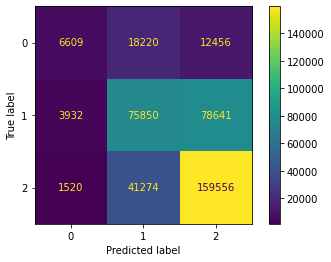

In [ ]:
disp.plot()
plt.show()

In [ ]:
cm = confusion_matrix(y_test, preds, labels=model.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

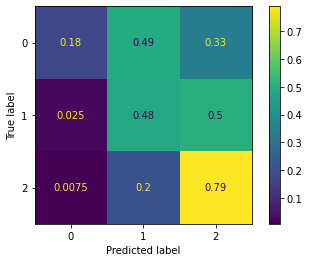

In [ ]:
disp.plot()
plt.show()

In [ ]:
df_train.label.value_counts()

2    471774
1    370235
0     86792
Name: label, dtype: int64